In [135]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [136]:
import pandas as pd

In [165]:
productos = pd.read_csv('../Proyecto/Data/MaestroCorregido.csv', ';')
facturas = pd.read_csv('../Proyecto/Data/FacturacionCorregida.csv', ';')
existencias = pd.read_csv('../Proyecto/Data/ExistenciasNew.csv', ',')
clasificacion = pd.read_csv('../Proyecto/Data/Clasificacion.csv', ';')
facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36276 entries, 0 to 36275
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   C.O.                  36276 non-null  int64 
 1   Desc. C.O.            36276 non-null  object
 2   REF_Combinada         36276 non-null  object
 3   Nro documento         36276 non-null  object
 4   Fecha                 36276 non-null  object
 5   Cantidad inv.         36276 non-null  int64 
 6   Suma de Vlr_Bruto     36276 non-null  int64 
 7   Suma de Vlr_Subtotal  36276 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.2+ MB


In [166]:
facturas['Fecha'] = pd.to_datetime(facturas['Fecha'], dayfirst=True)

In [167]:
facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36276 entries, 0 to 36275
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   C.O.                  36276 non-null  int64         
 1   Desc. C.O.            36276 non-null  object        
 2   REF_Combinada         36276 non-null  object        
 3   Nro documento         36276 non-null  object        
 4   Fecha                 36276 non-null  datetime64[ns]
 5   Cantidad inv.         36276 non-null  int64         
 6   Suma de Vlr_Bruto     36276 non-null  int64         
 7   Suma de Vlr_Subtotal  36276 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.2+ MB


In [168]:
facturas['Año'] = facturas['Fecha'].dt.year
facturas['Mes'] = facturas['Fecha'].dt.month
facturas['AñoMes'] = facturas['Fecha'].dt.to_period('M')

In [169]:
historico_ventas = facturas.groupby('AñoMes').count()['C.O.'].reset_index()
historico_ventas_cantidad = facturas.groupby('AñoMes').sum()['Cantidad inv.'].reset_index()

<AxesSubplot:title={'center':'Historico de cantidad de productos vendidos'}, xlabel='AñoMes'>

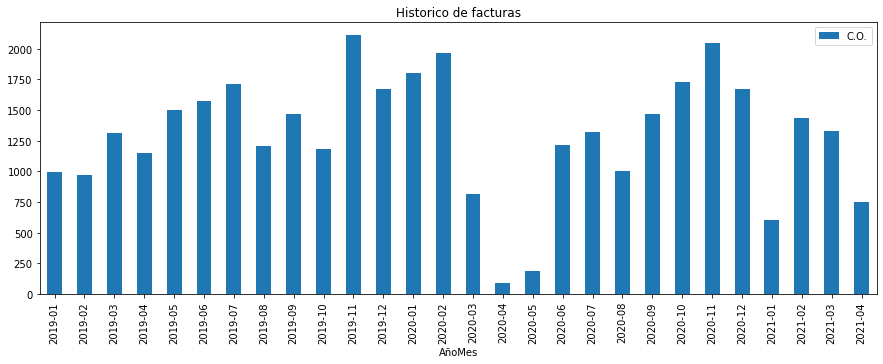

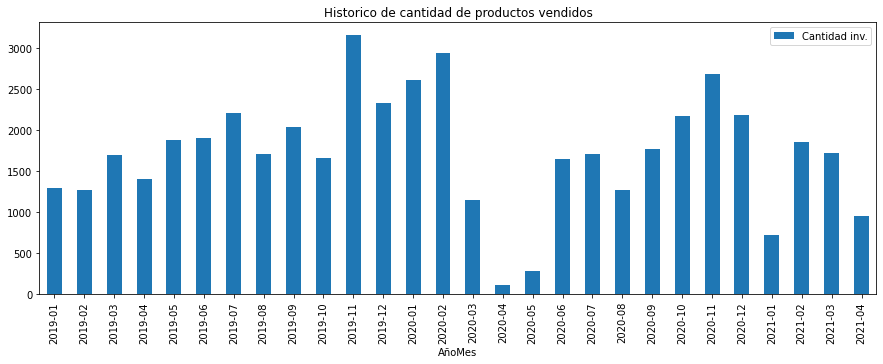

In [170]:
historico_ventas.plot.bar(x='AñoMes', figsize=(15,5), title='Historico de facturas')
historico_ventas_cantidad.plot.bar(x='AñoMes', figsize=(15,5), title='Historico de cantidad de productos vendidos')

In [171]:
ventas_x_mes = facturas.groupby('Mes').count()['C.O.']
ventas_x_mes_mean = facturas.groupby('Mes').mean()['C.O.']

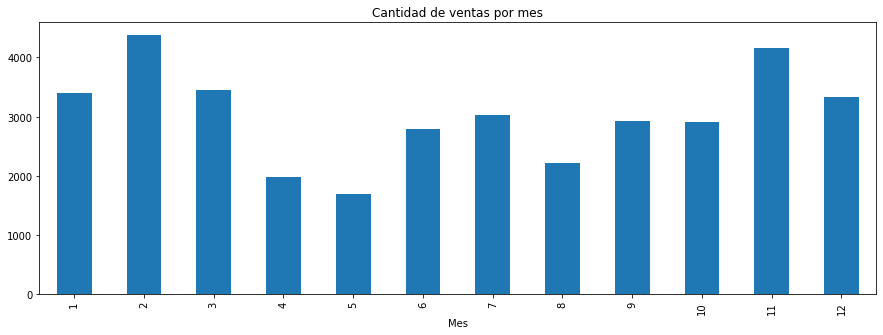

<AxesSubplot:title={'center':'Promedio de ventas por mes'}, xlabel='Mes'>

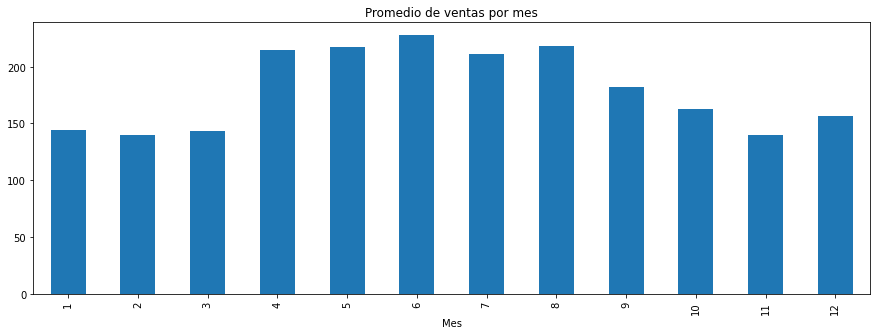

In [172]:
ventas_x_mes.plot.bar(x='Mes', figsize=(15,5), title='Cantidad de ventas por mes')
plt.pause(0.05)
ventas_x_mes_mean.plot.bar(x='Mes', figsize=(15,5), title='Promedio de ventas por mes')

In [131]:
existencias[existencias['Referencia'].str.contains('A00580')]

,DEPARTAMENTO,SUBCATEGORIA,REF_Combinada,Referencia,Ext. 1 detalle,Ext. 2 detalle,Disp.


In [132]:
existencias.sort_values('Referencia')

,DEPARTAMENTO,SUBCATEGORIA,REF_Combinada,Referencia,Ext. 1 detalle,Ext. 2 detalle,Disp.
187,P001 - COMEDORES,SILL - SILLAS DE COMEDOR,A01040:00005:,A01040,5.0,NaN,79
497,P003 - SALAS Y SOFAS,CNTR - CENTROS DE ENTRETENIMIENTO,BR0001:00193:,BR0001,193.0,NaN,40
919,P006 - ESTUDIO,ESTA - ESTANTES,BR0002:00193:,BR0002,193.0,NaN,27
920,P006 - ESTUDIO,ESTA - ESTANTES,BR0003:00194:,BR0003,194.0,NaN,25
901,P006 - ESTUDIO,ESCR - ESCRITORIOS,BR0004:00193:,BR0004,193.0,NaN,53
...,...,...,...,...,...,...,...
459,P002 - ALCOBAS,CAMA - CAMA,YR0073:00009:,YR0073,9.0,NaN,3
629,P003 - SALAS Y SOFAS,MCET - MESAS DE CENTRO,YX0090:00009:,YX0090,9.0,NaN,5
82,P001 - COMEDORES,MCOM - MESAS DE 4P,YX0093:00009:,YX0093,9.0,NaN,12
380,P001 - COMEDORES,SILL - SILLAS DE COMEDOR,YX0105:00005:,YX0105,5.0,NaN,8
